In [1]:
import random
import numpy

In [2]:
y=[0]*10
for i in range(10):
    y[i]=2*random.random()-1

In [3]:
y

[-0.41889807589779116,
 0.4157573150881544,
 0.7527808010522516,
 0.24614635742654567,
 0.70317314438217,
 -0.19211266770453927,
 -0.3029524896998508,
 0.21473311656573202,
 -0.6085318298975952,
 0.09363167710979692]

In [4]:
x=[i for i in range(10)]

In [5]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
d=numpy.zeros((10,2))

In [7]:
for i in range(10):
    d[i][0]=x[i]
    d[i][1]=y[i]

In [8]:
d

array([[ 0.        , -0.41889808],
       [ 1.        ,  0.41575732],
       [ 2.        ,  0.7527808 ],
       [ 3.        ,  0.24614636],
       [ 4.        ,  0.70317314],
       [ 5.        , -0.19211267],
       [ 6.        , -0.30295249],
       [ 7.        ,  0.21473312],
       [ 8.        , -0.60853183],
       [ 9.        ,  0.09363168]])

In [9]:
d.shape

(10, 2)

In [10]:
pol=numpy.polyfit(d[:,0],d[:,1],9)
pol

array([-2.10318270e-04,  8.87899920e-03, -1.57431862e-01,  1.52138615e+00,
       -8.69366379e+00,  2.97684078e+01, -5.88051867e+01,  5.98740811e+01,
       -2.26816061e+01, -4.18898076e-01])

In [11]:
y2=numpy.polyval(pol,d[:,0])

In [12]:
dp=numpy.zeros((10,2))
for i in range(10):
    dp[i][0]=x[i]
    dp[i][1]=y2[i]

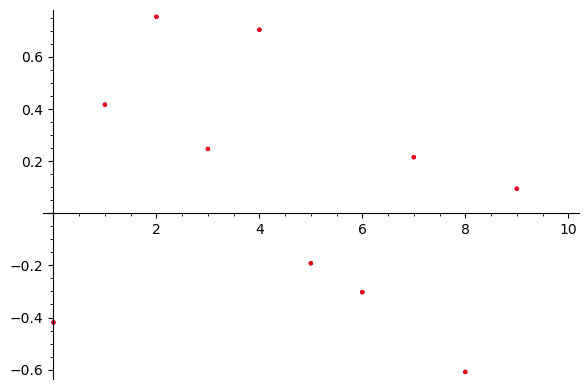

In [27]:
g=Graphics()
g+=list_plot(d, color='blue')
g+=list_plot(dp, color='red')
g.show(xmin=0,xmax=10)
g.save_image("q1_data_points.eps")

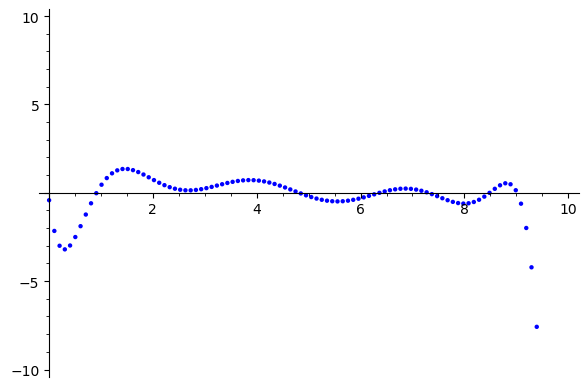

In [28]:
X=numpy.linspace(0.0,10.0,num=100)
Y=numpy.polyval(pol,X)
D=numpy.zeros((100,2))
for i in range(100):
    D[i][0]=X[i]
    D[i][1]=Y[i]
grph=list_plot(D,xmin=0,xmax=10,ymin=-10,ymax=10)
grph.show()
grph.save_image("q1_fitted_func_100points.eps")

In [15]:
pol

array([-2.10318270e-04,  8.87899920e-03, -1.57431862e-01,  1.52138615e+00,
       -8.69366379e+00,  2.97684078e+01, -5.88051867e+01,  5.98740811e+01,
       -2.26816061e+01, -4.18898076e-01])

In [16]:
t=polygen(RR)
eqn=pol[0]*t^9+pol[1]*t^8+pol[2]*t^7+pol[3]*t^6+pol[4]*t^5+pol[5]*t^4+pol[6]*t^3+pol[7]*t^2+pol[8]*t^1+pol[9]

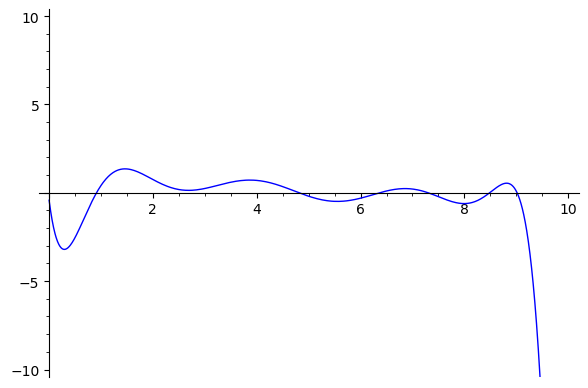

In [17]:
plot(eqn, xmin=0,xmax=10,ymin=-10,ymax=10)

In [18]:
deqn=eqn.differentiate()
ddeqn=deqn.differentiate()

In [19]:
mp_x=list()
mp_y=list()
for i in range(len(deqn.roots())):
    mp_x.append(deqn.roots()[i][0])

In [20]:
for i in mp_x:
    if(pol[0]>=0):
        if(ddeqn.substitute(t=i)<0):
            mp_x.remove(i)
    elif(pol[0]<0):
        if(ddeqn.substitute(t=i)>0):
            mp_x.remove(i) 
print(ddeqn.substitute(x=mp_x[1]))

-1.97563507768071


In [21]:
mp_y=numpy.polyval(pol,mp_x)

In [22]:
maxmin_d=numpy.zeros((len(mp_x),2))
for i in range(len(mp_x)):
    maxmin_d[i][0]=mp_x[i]
    maxmin_d[i][1]=mp_y[i]

In [23]:
print(mp_x)
print(mp_y)

[1.46236710020521, 3.86586293570138, 6.85612594033160, 8.81303839974283]
[1.35681435 0.72110165 0.24026851 0.54586359]


In [24]:
maxmin_d

array([[1.4623671 , 1.35681435],
       [3.86586294, 0.72110165],
       [6.85612594, 0.24026851],
       [8.8130384 , 0.54586359]])

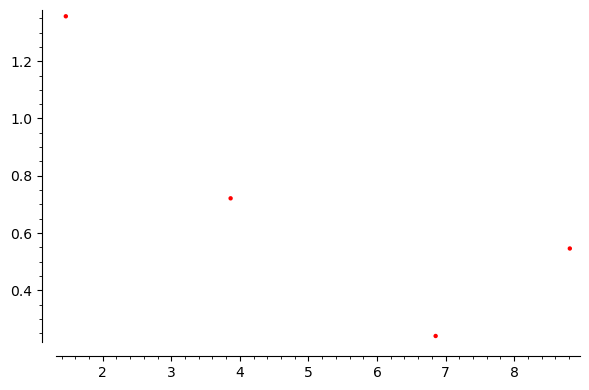

In [25]:
list_plot(maxmin_d,color='red')

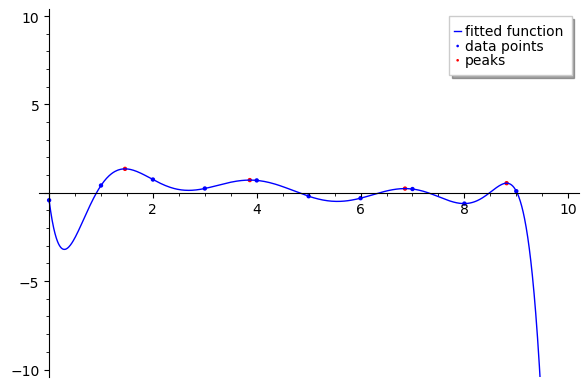

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [29]:
f=Graphics()
f+=list_plot(d, color='blue',legend_label='data points')
f+=plot(eqn, xmin=0,xmax=10,ymin=-10,ymax=10,legend_label='fitted function')
f+=list_plot(maxmin_d,color='red',legend_label='peaks')
f.show()
f.save_image("q1_peaks.eps")